In [2]:
#Importing the neccesary python packages/ libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
Loading the datasets into python as a DataFrame
airport_data = pd.read_csv('/Users/matthewstabile/airports.csv')
medical_data = pd.read_csv('/Users/matthewstabile/medicalCosts.csv')

/var/folders/fs/_rf26k9d23335sg32kv868dc0000gn/T/ipykernel_11750/2654915783.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  airport_data = pd.read_csv('/Users/matthewstabile/airports.csv')


In [4]:
#Brief look at the airport dataset
airport_data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
2,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
3,2.00503E+12,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
4,2.00503E+12,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle


In [5]:
#Taking a look at the data types of the columns
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94848 entries, 0 to 94847
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Claim Number   94848 non-null  object 
 1   Date Received  94848 non-null  object 
 2   Incident Date  94848 non-null  object 
 3   Airport Code   94848 non-null  object 
 4   Airport Name   94848 non-null  object 
 5   Airline Name   94848 non-null  object 
 6   Claim Type     94848 non-null  object 
 7   Claim Site     94848 non-null  object 
 8   Item           94848 non-null  object 
 9   Claim Amount   94848 non-null  float64
 10  Status         94848 non-null  object 
 11  Close Amount   94848 non-null  float64
 12  Disposition    94848 non-null  object 
dtypes: float64(2), object(11)
memory usage: 9.4+ MB


In [6]:
#Taking a look at the stats of the data
airport_data.describe()

,Claim Amount,Close Amount
count,9.484800e+04,94848.000000
mean,3.634831e+03,89.046256
std,5.249437e+05,882.058837
min,0.000000e+00,0.000000
25%,6.500000e+01,0.000000
50%,1.836900e+02,0.000000
75%,4.806425e+02,61.972500
max,1.250000e+08,250000.000000


In [7]:
#How many rows and columns are we working with?
airport_data.shape

(94848, 13)

In [8]:
#Brief look at the medical dataset
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
#medical dataset data types
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#medical dataset stats
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#medical data rows & columns
medical_data.shape

(1338, 7)

In [12]:
#Checking for duplicates in the airport dataset
print("The shape of the airport dataset is: " + str(airport_data.shape))
duplicates = airport_data.duplicated()
print("Number of duplicate rows:", duplicates.sum())
#16 duplicates were found

The shape of the airport dataset is: (94848, 13)
Number of duplicate rows: 16


In [13]:
#Dropping those duplicates
airport_data = airport_data.drop_duplicates()
print("The new shape of the airport dataset is :" + str(airport_data.shape))
#16 Duplicates were dropped

The new shape of the airport dataset is :(94832, 13)


In [14]:
#Checking for duplicates in the medical dataset
print("The shape of the medical dataset is: " + str(medical_data.shape))
duplicates = medical_data.duplicated()
print("Number of duplicate rows:", duplicates.sum())
#1 duplicate value was found

The shape of the medical dataset is: (1338, 7)
Number of duplicate rows: 1


In [15]:
#Dropping those duplicates
medical_data = medical_data.drop_duplicates()
print("The new shape of the medical dataset is :" + str(medical_data.shape))
#1 duplicate was dropped

The new shape of the medical dataset is :(1337, 7)


In [16]:
#Checking for NA values in the airport dataset
na_data = airport_data.isnull().sum()
print("Number of missing values:\n", na_data)
#No NA values found

Number of missing values:
 Claim Number     0
Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
Item             0
Claim Amount     0
Status           0
Close Amount     0
Disposition      0
dtype: int64


In [17]:
#Dropping those NA values
airport_data.dropna(inplace = True)

In [18]:
#Checking for NA values in the medical dataset
na_data = medical_data.isnull().sum()
print("Number of missing values:\n", na_data)
#No NA values found

Number of missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [19]:
#Dropping those NA values
medical_data.dropna(inplace = True)

In [21]:
#Renaming the columns in the airport dataframe
airport_data.rename(columns = {'Claim Number' : 'claim_number', 'Date Received' : 'date_received', 'Incident Date' : 'incident_date', 'Airport Code' : 'airport_code', 'Airport Name' : 'airport_name', 'Airline Name' : 'airline_name', 'Claim Type' : 'claim_type', 'Claim Site' : 'claim_site', 'Item' : 'item', 'Claim Amount' : 'claim_amount', 'Status' : 'status', 'Close Amount' : 'close_amount', 'Disposition' : 'disposition'}, inplace = True)

In [22]:
#Checking to see that the column names have changed
airport_data.head()

,claim_number,date_received,incident_date,airport_code,airport_name,airline_name,claim_type,claim_site,item,claim_amount,status,close_amount,disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
2,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
3,2.00503E+12,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
4,2.00503E+12,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle


In [23]:
#Changing the numeric columns to float datatype and checking that the changes were made
airport_data = airport_data.astype({'claim_amount' : 'float', 'close_amount' : 'float'})
airport_data.dtypes

claim_number      object
date_received     object
incident_date     object
airport_code      object
airport_name      object
airline_name      object
claim_type        object
claim_site        object
item              object
claim_amount     float64
status            object
close_amount     float64
disposition       object
dtype: object

In [24]:
#Changing the date received column to the datetime datatype and checking that the change was made
airport_data['date_received']=pd.to_datetime(airport_data.date_received)
airport_data.dtypes

claim_number             object
date_received    datetime64[ns]
incident_date            object
airport_code             object
airport_name             object
airline_name             object
claim_type               object
claim_site               object
item                     object
claim_amount            float64
status                   object
close_amount            float64
disposition              object
dtype: object

<AxesSubplot:title={'center':'Number of Claims per Site'}, xlabel='Claim Site', ylabel='Number of Claims'>

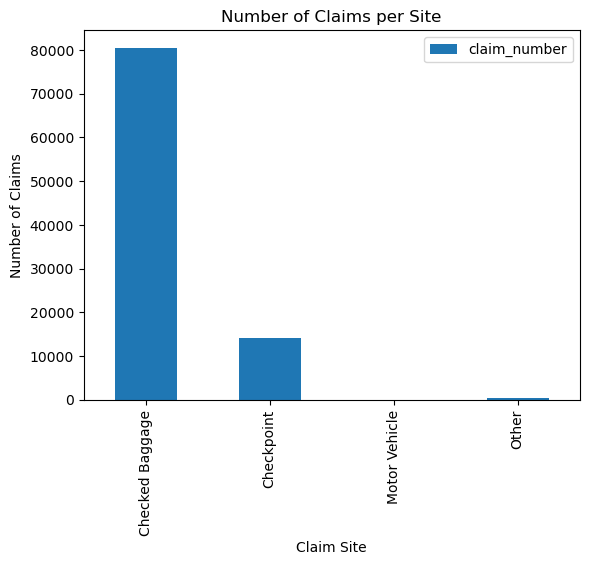

In [25]:
#Plotting number of claims from each claim site
airport_data.groupby('claim_site').aggregate({'claim_number' : 'count'}).plot.bar(title = 'Number of Claims per Site', xlabel = 'Claim Site', ylabel = 'Number of Claims')

In [27]:
#Getting correlations of children, bmi, and age with charges
medical_data.corr()[['charges']].sort_values(by = 'charges', ascending = False)

,charges
charges,1.000000
age,0.298308
bmi,0.198401
children,0.067389


AxesSubplot(0.125,0.11;0.775x0.77)


(1337, 7)

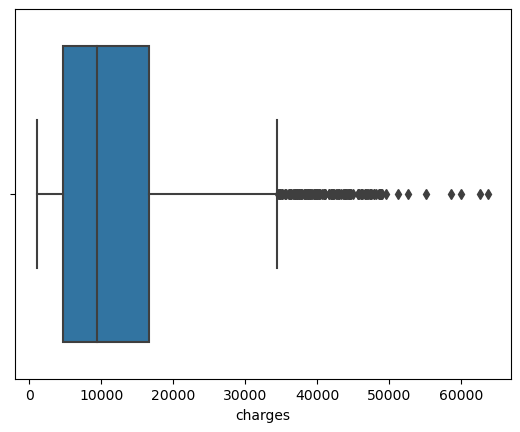

In [28]:
#Check for outliers in charges column
print(sns.boxplot(x = medical_data['charges']))
medical_data.shape

In [29]:
#Remove outliers in charges column
Q1 = np.percentile(medical_data['charges'], 25, interpolation = 'midpoint')
Q3 = np.percentile(medical_data['charges'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
medical_data = medical_data.loc[(medical_data['charges'] < upper) & (medical_data['charges'] > lower)]
#Checking to make sure outliers have been removed
medical_data.shape

(1198, 7)

<AxesSubplot:xlabel='region'>

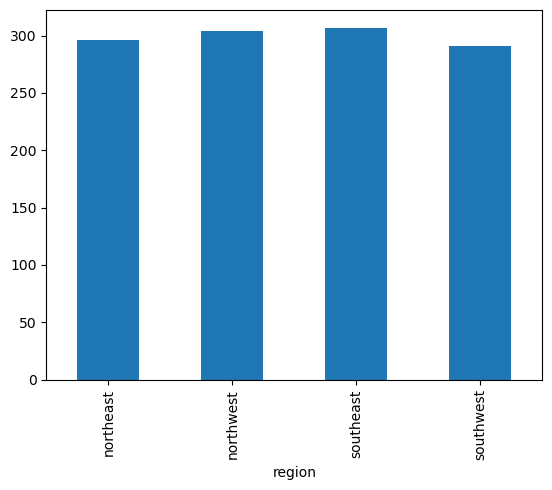

In [30]:
#Number of pople distributed by region plotted using chain method
medical_data.groupby(['region'])['region'].count().plot.bar()

In [32]:
#Whats the average claim amount
print('The average claim amount is : ' + str(airport_data['claim_amount'].mean()))

The average claim amount is : 3635.4109774129097


<AxesSubplot:ylabel='Frequency'>

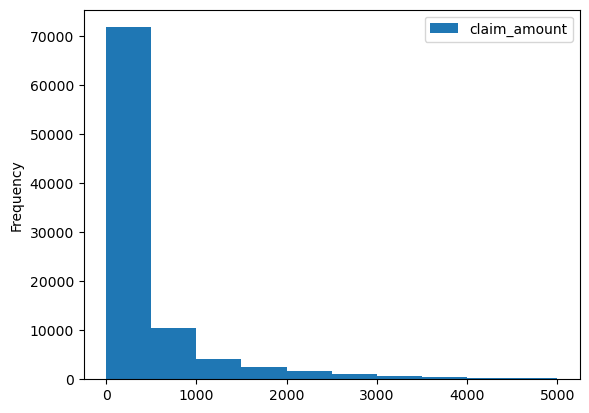

In [33]:
#Whats the distribution of claims less that $5000
airport_data[['claim_amount']].query('claim_amount < 5000').plot.hist()

In [34]:
#What are the top 5 airports with the most claims?
top_5_claims_airports = airport_data.groupby(['airport_name'])['claim_amount'].count().sort_values(ascending = False)
top_5_claims_airports.head(5)

airport_name
Los Angeles International Airport       4492
John F. Kennedy International           3835
Chicago O'Hare International Airport    3619
Newark International Airport            3593
Miami International Airport             2986
Name: claim_amount, dtype: int64

In [36]:
#What percentage of people in the dataset are obese?
obesity_percentage = (medical_data[medical_data['bmi'] >= 30]['bmi'].count() / medical_data['bmi'].count()) * 100
obesity_percentage_rounded = obesity_percentage.round(2)
print(f'The percentage of people who are obese in the medical costs dataset is: %'+ str(obesity_percentage_rounded))

The percentage of people who are obese in the medical costs dataset is: %47.75


In [37]:
#Creating a multiple regression using all variables 
catcols = ['sex', 'smoker', 'region']
dummies = pd.get_dummies(medical_data[catcols])

In [38]:
#Continued
medicalDummies = medical_data.drop(columns = catcols)
dataDummies = medicalDummies.join(dummies)
dataDummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1198 non-null   int64  
 1   bmi               1198 non-null   float64
 2   children          1198 non-null   int64  
 3   charges           1198 non-null   float64
 4   sex_female        1198 non-null   uint8  
 5   sex_male          1198 non-null   uint8  
 6   smoker_no         1198 non-null   uint8  
 7   smoker_yes        1198 non-null   uint8  
 8   region_northeast  1198 non-null   uint8  
 9   region_northwest  1198 non-null   uint8  
 10  region_southeast  1198 non-null   uint8  
 11  region_southwest  1198 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 88.4 KB


In [39]:
#Scaling numerical independent variables
scaler = StandardScaler()
numCols = ['age', 'bmi', 'children', 'charges']
dataDummies[numCols] = scaler.fit_transform(dataDummies[numCols])
dataDummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.423338,-0.365157,-0.893931,0.960352,1,0,0,1,0,0,0,1
1,-1.494481,0.611462,-0.070139,-1.134296,0,1,1,0,0,0,1,0
2,-0.783050,0.483354,1.577444,-0.757919,0,1,1,0,0,0,1,0
3,-0.427334,-1.229473,-0.893931,1.664982,0,1,1,0,0,1,0,0
4,-0.498477,-0.202110,-0.893931,-0.838421,0,1,1,0,0,1,0,0


In [40]:
#Checking correlations of variables with charges
dataDummies.corr()[['charges']].sort_values(by = 'charges', ascending = False)

,charges
charges,1.000000
smoker_yes,0.602238
age,0.436891
children,0.082932
region_northeast,0.063449
region_northwest,0.036872
sex_female,0.023405
sex_male,-0.023405
region_southeast,-0.029230
bmi,-0.066453


In [41]:
#Splitting data into train and test subsets with a ratio of 0.3
medicalTrain, medicalTest = train_test_split(dataDummies, test_size = 0.3, random_state = 20)

In [42]:
#Making predictions and evaluating the model performance
model = LinearRegression()
xCols = medicalTrain.corr().drop(columns=['charges']).columns.tolist()
print(model.fit(medicalTrain[xCols], medicalTrain['charges']))
print("The RSquare Score Is: " + str(model.score(medicalTest[xCols], medicalTest['charges'])))
print("The Intercept Is: " + str(model.intercept_))
print("The Coefficients of each of the varibles are: " + str(model.coef_))
y_predicted = model.predict(medicalTest[xCols])
predicted = pd.DataFrame(y_predicted, columns=['PredictedCharges'])
final = predicted.join([medicalTest[xCols].reset_index(drop=True),
medicalTest['charges'].reset_index(drop=True)])
final[['PredictedCharges', 'charges']]

LinearRegression()
The RSquare Score Is: 0.5145005005484817
The Intercept Is: 0.7908060669171582
The Coefficients of each of the varibles are: [ 0.47640183  0.05943851  0.07436153  0.00765466 -0.00765466 -1.03574258
  1.03574258  0.12170102  0.02347898 -0.05239117 -0.09278883]


,PredictedCharges,charges
0,0.620866,0.511381
1,0.397719,0.275860
2,0.356097,3.252269
3,-0.574512,-0.771591
4,-0.141940,-0.357394
...,...,...
355,-0.978658,-1.137177
356,-0.482386,-0.716245
357,-0.671611,-0.928682
358,-0.187800,-0.366601


In [43]:
#Importance of each independent variable in terms of their contributions to the dependent variable.
(pd.DataFrame({'coef':model.coef_, 'Variable':xCols})
.sort_values(by = 'coef', ascending = False)
.set_index('Variable'))

,coef
Variable,
smoker_yes,1.035743
age,0.476402
region_northeast,0.121701
children,0.074362
bmi,0.059439
region_northwest,0.023479
sex_female,0.007655
sex_male,-0.007655
region_southeast,-0.052391


In [45]:
airport_data

,claim_number,date_received,incident_date,airport_code,airport_name,airline_name,claim_type,claim_site,item,claim_amount,status,close_amount,disposition
0,0909802M,2002-01-04,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202445M,2002-02-04,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
2,0909816M,2002-02-07,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
3,2.00503E+12,2002-02-18,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
4,2.00503E+12,2002-02-18,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94843,2010010000000.0,2009-12-31,12/14/2009 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),175.90,Denied,0.00,Deny
94844,2010010000000.0,2009-12-31,12/17/2009 7:55,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cell Phones (smartphone type-blackberry; iphon...,695.00,Denied,0.00,Deny
94845,2010010000000.0,2009-12-31,12/15/2009 0:00,SMF,Sacramento International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Locks,25.50,Denied,0.00,Deny
94846,2010010000000.0,2009-12-31,12/16/2009 10:00,ENV,Wendover Municipal Airport,Xtra Airways,Passenger Property Loss,Checked Baggage,Locks,20.00,Denied,0.00,Deny


<AxesSubplot:xlabel='date_received', ylabel='close_amount'>

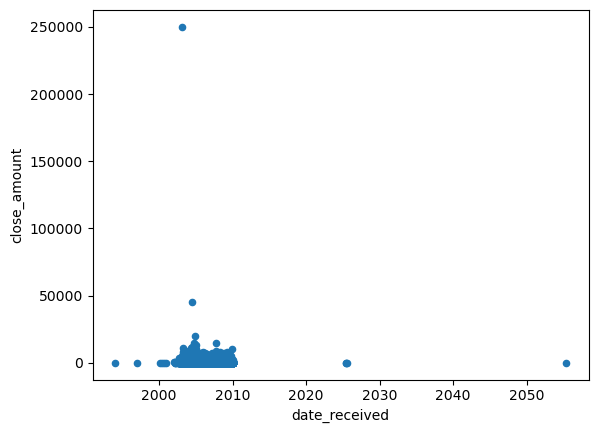

In [50]:
#Finding the pattern or trend for close amount
airport_data.plot.scatter(x='date_received', y='close_amount')
#There seems to be a spike in claim amounts around 2005 and then it comes back down significantly

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 9.0000e+00, 7.2280e+03, 1.6986e+04, 2.1027e+04,
        1.7924e+04, 1.8785e+04, 1.2646e+04, 2.1700e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 8770.  ,  9218.24,  9666.48, 10114.72, 10562.96, 11011.2 ,
        11459.44, 11907.68, 12355.92, 12804.16, 13252.4 , 13700.64,
        14148.88, 14597.12, 15045.36, 15493.6 , 15941.84, 16390.08,
        16838.32, 17286.56, 17734.8 , 18183.04, 18631.28, 19079.52,
        19527.76, 19976.  , 20424.24, 20872.48

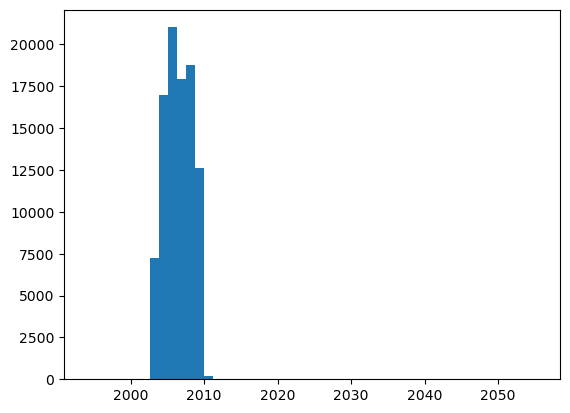

In [52]:
#Creating a visual that shows the patten or trend
plt.hist(airport_data['date_received'], bins = 50)

In [56]:
#Creating a variable that puts people into weight status groups based on their BMI
bins = [0, 18.5, 25, 30, 100]
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']
medical_data['weight_class'] = pd.cut(medical_data['bmi'], bins = bins, labels = labels)
medical_data.head()

,age,sex,bmi,children,smoker,region,charges,weight_class
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


Text(0.5, 1.0, 'Distribution Of Weight Status')

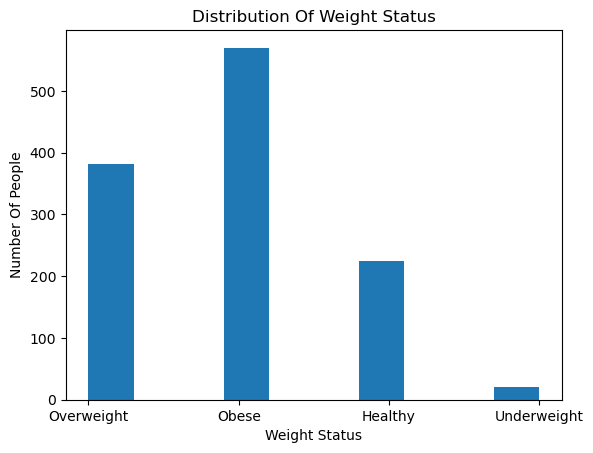

In [65]:
#Creating a visualization to show the groups
plt.hist(medical_data['weight_class'])
plt.xlabel('Weight Status')
plt.ylabel('Number Of People')
plt.title('Distribution Of Weight Status')